# Implementing ResNet
In this lab, you will continue exploring Model subclassing by building a more complex architecture.

Residual Networks make use of skip connections to make deep models easier to train.

There are branches as well as many repeating blocks of layers in this type of network.
You can define a model class to help organize this more complex code, and to make it easier to re-use your code when building the model.
As before, you will inherit from the Model class so that you can make use of the other built-in methods that Keras provides.


# *Imports*

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Lambda, Input, Flatten, Layer, concatenate, Conv2D
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation, MaxPool2D
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model


# ResNet




In [2]:
class IdentityBlock(Model):
    def __init__(self, filters =64, kernels= 3):
        super(IdentityBlock, self).__init__()
        self.conv1 = Conv2D(filters, kernel_size=kernels, padding='same')
        self.bn1 = BatchNormalization()

        self.conv2 = Conv2D(filters, kernel_size=kernels, padding='same')
        self.bn2 = BatchNormalization()

        self.act = Activation('relu')
        self.add = tf.keras.layers.Add()

    def call(self, inputs, training=None, mask=None):
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.act(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.act(x)
        x = self.add([x, inputs])

        x = self.act(x)
        return x


In [17]:
class ResNet(Model):
    def __init__(self, classes = 10):
        super(ResNet, self).__init__()

        self.flat = Flatten()

        self.conv = Conv2D(64, kernel_size=7, padding='same')
        self.batch = BatchNormalization()
        self.act = Activation('relu')
        self.max = MaxPool2D((3,3))

        self.id1 = IdentityBlock(64, 3)
        self.id2 = IdentityBlock(64,3)

        self.glob = tf.keras.layers.GlobalAveragePooling2D()
        self.classifier = Dense(classes, activation = 'softmax')

    def call(self, inputs):
        inputs = tf.expand_dims(inputs, axis = -1) #note that conv2d need extra dim for RGB
        x = self.conv(inputs)
        x = self.batch(x)
        x = self.act(x)
        x = self.max(x)

        x = self.id1(x)
        x = self.id2(x)
        
        x = self.glob(x)
        return self.classifier(x)

# Data , Mnist

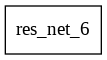

In [21]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Model

mnist_model = ResNet(10)
plot_model(mnist_model, show_shapes=True)

# Training the Model
As mentioned before, inheriting the Model class allows you to make use of the other APIs that Keras provides, such as:

training
serialization
evaluation
You can instantiate a Resnet object and train it as usual like below:# 


In [20]:
mnist_model.compile(loss = tf.losses.sparse_categorical_crossentropy,
              optimizer=tf.optimizers.RMSprop(),
              metrics= ['accuracy'])


mnist_model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2803 - accuracy: 0.9261
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0531 - accuracy: 0.9844
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0360 - accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0295 - accuracy: 0.9908
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0252 - accuracy: 0.9920
